In [423]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Determine column to merge on
print(city_df.columns)
print(ride_df.columns)

# Combine the data into a single dataset
city_ride_df = city_df.merge(ride_df, on = "city")

Index(['city', 'driver_count', 'type'], dtype='object')
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


In [424]:
# Display the data table to preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [425]:
# Create separate dataframes each of the three city types
urban = city_ride_df.loc[(city_ride_df["type"] == "Urban")]
suburban = city_ride_df.loc[(city_ride_df["type"] == "Suburban")]
rural = city_ride_df.loc[(city_ride_df["type"] == "Rural")]

In [426]:
# Get average fare for each city 
# Get total rides for each city
# Get total drivers in each city 
# Plot the scatterplots

In [427]:
#Urban
u_average_fare = urban.groupby(["city"])["fare"].mean()
u_total_rides = urban.groupby(["city"])["ride_id"].count()
u_total_drivers = urban.groupby(["city"])["driver_count"].value_counts()

In [428]:
# Suburban
s_average_fare = suburban.groupby(["city"])["fare"].mean()
s_total_rides = suburban.groupby(["city"])["ride_id"].count()
s_total_drivers = suburban.groupby(["city"])["driver_count"].value_counts() 

In [429]:
# Rural
r_average_fare = rural.groupby(["city"])["fare"].mean()
r_total_rides = rural.groupby(["city"])["ride_id"].count()
r_total_drivers = rural.groupby(["city"])["driver_count"].value_counts() 

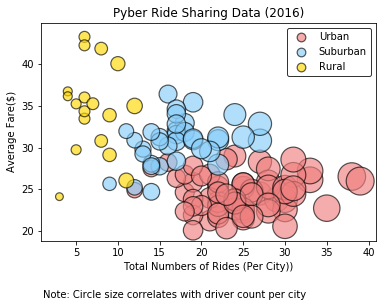

In [447]:
# Create scatterplots for each city type

# Urban 
plt.scatter(u_total_rides,u_average_fare, color = "lightcoral", edgecolors="black", s = u_total_drivers *20, label = "Urban", alpha = 0.65, linewidth = 1.2)

# Suburban
plt.scatter(s_total_rides,s_average_fare, color = "lightskyblue", edgecolors="black", s = s_total_drivers *20, label = "Suburban", alpha = 0.65, linewidth = 1.2)

# Rural
plt.scatter(r_total_rides,r_average_fare, color = "gold", edgecolors="black", s = r_total_drivers *20, label = "Rural", alpha = 0.65, linewidth = 1.2)


#Incorporate other graph properties 

#Title the graph
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend in the upper right corner
lgnd = plt.legend(loc= "upper right",frameon = True, edgecolor = "black")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Label the y-axis
plt.ylabel("Average Fare($)")

# Label the x-axis
plt.xlabel("Total Numbers of Rides (Per City))")

# Label the y-axis
plt.ylabel("Average Fare($)")


# Incorporate a text label regarding circle size
plt.text(1,12,"Note: Circle size correlates with driver count per city")

# Plot and save Figure
plt.savefig("figures/Pyber Ride Sharing Data.png")
plt.show()

## Total Fares by City Type

In [432]:
# Build pie chart properties
labels = ["Rural","Suburban","Urban" ]
colors = ["Gold","Lightskyblue","Lightcoral"]
explode = (0, 0,.15)

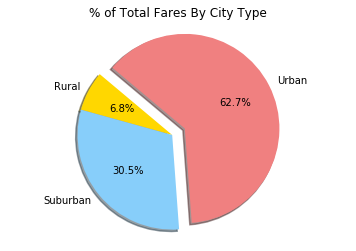

In [444]:
# Calculate percent of total fares by city types
total_fare = city_ride_df.groupby(['type'])['fare'].sum()

# Plot, label, and save figure
plt.pie(total_fare, explode=explode, labels=labels,wedgeprops = {'linewidth': 1.5}, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.title("% of Total Fares By City Type")
plt.axis("equal")
plt.savefig("figures/% of Total Fares By City Type.png")
plt.show()


## Total Rides by City Type

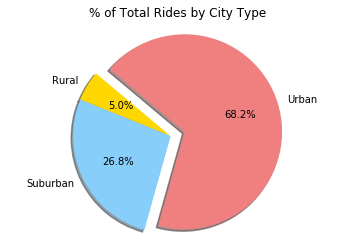

In [443]:
# Calculate Ride Percents
rides_by_type = city_ride_df.groupby("type").sum()["ride_id"]

# Build Pie Chart
plt.pie(rides_by_type, startangle = 140, explode = explode, colors = colors, wedgeprops = {'linewidth': 1.5}, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Plot, label, and save figure
plt.savefig("figures/% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

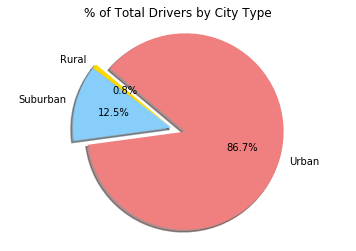

In [442]:
# Calculate percent of total drivers by city type
driver_total = city_ride_df.groupby("type").sum()["driver_count"]

# Build Pie Chart
plt.pie(driver_total, startangle = 140, explode = explode, wedgeprops = {'linewidth': 1.5}, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Plot, label, and save figure
plt.savefig
plt.show("figures/% of Total Drivers by City Type")

3 observable trends:

1 - The vast majority of Pyber drivers drive in urban areas. 

2 - The average fare is higher in rural areas, which can be due to longer distances traveled or surge pricing for higher demand and fewer drivers in these areas.

3 - As the number of rides increases in a city, the average fare dcreases. 